In [2]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(20)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1:2].values ## Just to specify that it is a matrix not a vector. 
## We could have also done X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values


# Splitting the dataset into the Training set and Test set - Not required as the number of observation is small
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""
print(y)
print("\n")
print(X)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


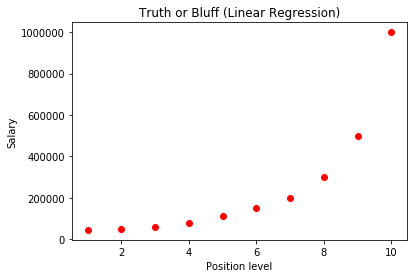

In [4]:
# Visualising the Data. It doesnt follow a Linear Model
plt.scatter(X, y, color = 'red')
#plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [13]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Transforming X to its Polynomial terms
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) 
## Play with this feature and notice the change. 
## In case degree=2; y=b0+b1x1+b1[(x1)*x1]

X_poly = poly_reg.fit_transform(X) ## Fit the object with X and then transform X to X_poly.

X_poly ##[left most column is the constant B0; X is in the middle; degree is the third column]
       ## It contains the independent variable and its associated polynomial term

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [14]:
## Fit X_poly into Linear Regression Model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

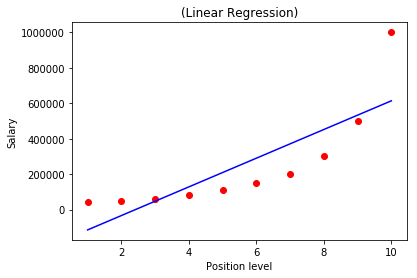

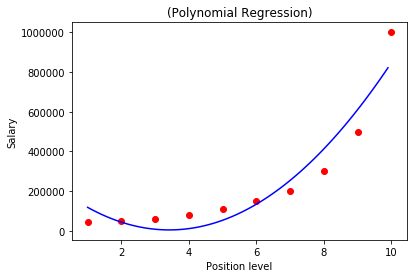

In [8]:
# Visualising the data with Linear Regression
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue') ## Dont use X_poly instead of lin_reg.predict(X) as X_Poly has been fit with existing set already
plt.title('(Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1) # Considers imagionary Levels like 1.1; 1.2; 1.3; 9.7; 9.8
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [9]:
# Predicting a new result with Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [15]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6)) ## should be between 150000-200000

array([134484.84848485])